In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
if aequ_dir not in sys.path:
    sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402
stdout_handler = logging.StreamHandler(sys.stdout)
logger.addHandler(stdout_handler)

import utils

In [4]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Anaheim" #"Berlin-Center" #
folder = os.path.join(tntp_dir, scenario)

if scenario == "Berlin-Center":
    link_file =  "berlin-center_net_clean.tntp" # DUPLICATE NODES REMOVED  "berlin-center_net_clean_bpr_altered.tntp" #
    trip_file =  "berlin-center_trips.tntp"
else:
    link_file =  f"{scenario}_net.tntp"
    trip_file =  f"{scenario}_trips.tntp"
    
# best_known_solution = list(filter(lambda x: "_flow.tntp" in x, os.listdir(folder)))
# if len(best_known_solution) == 1:
#     sol_file = best_known_solution[0]
# else:
#     sol_file = None
if scenario == "Anaheim":
    best_sol = pd.read_csv(os.path.join(folder, f"{scenario}_flow.tntp"), sep='\t', skiprows=5).rename(columns={"Tail ": "a_node", "Head ": "b_node", "Volume ": "flow_best"}).drop(columns=['~ ', ': ', '; ', 'Cost '])

In [19]:
block_centroids = True
r_gap = 1e-6

In [21]:
%%time
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bush-based", block_centroids=block_centroids, rgap=r_gap)

bush-based Assignment STATS


[autoreload of aequilibrae.paths.traffic_assignment failed: Traceback (most recent call last):
  File "/mnt/c/Users/jan.zill/code/aequilibrae/.venv/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/mnt/c/Users/jan.zill/code/aequilibrae/.venv/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/mnt/c/Users/jan.zill/code/aequilibrae/.venv/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/mnt/c/Users/jan.zill/code/aequilibrae/.venv/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/mnt/c/Users/jan.zill/code/aequilibrae/.venv/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "/mnt/c/Users/jan.zill/code/aequilib

 Initialised data structures, num nodes = 416, num links = 914
 0th iteration done, cost = 1296185.75
check convergence: 0.0020655976391339426, want 1e-06, iter max = 250
Iteration 1, computed gap: 0.0020655976391339426, computed objective: 1287869.375
check convergence: 0.00010550308297574418, want 1e-06, iter max = 250
Iteration 2, computed gap: 0.00010550308297574418, computed objective: 1286209.75
check convergence: 1.4592302448046546e-05, want 1e-06, iter max = 250
Iteration 3, computed gap: 1.4592302448046546e-05, computed objective: 1286160.125
check convergence: 7.937644360911378e-06, want 1e-06, iter max = 250
Iteration 4, computed gap: 7.937644360911378e-06, computed objective: 1286154.25
check convergence: 3.618895446977355e-06, want 1e-06, iter max = 250
Iteration 5, computed gap: 3.618895446977355e-06, computed objective: 1286153.625
check convergence: 2.30993420702319e-06, want 1e-06, iter max = 250
Iteration 6, computed gap: 2.30993420702319e-06, computed objective: 1286

In [8]:
%%time
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=block_centroids, rgap=r_gap)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.01813536336911382,0.2561015932062777
# Alert: Adding 0.3333333333333333 to stepsize to make it non-zero
3,0.0036265961074987314,0.3333333333333333
# Alert: Adding 0.25 to stepsize to make it non-zero
4,0.0023005021214473923,0.25
# Alert: Adding 0.2 to stepsize to make it non-zero
5,0.0016660925434687926,0.2
# Alert: Adding 0.16666666666666666 to stepsize to make it non-zero
6,0.0013674148395810882,0.16666666666666666
# Alert: Adding 0.14285714285714285 to stepsize to make it non-zero
7,0.0011521665035999808,0.14285714285714285
# Alert: Adding 0.125 to stepsize to make it non-zero
8,0.0009970861455201863,0.125
# Alert: Adding 0.1111111111111111 to stepsize to make it non-zero
9,0.0008651833121821925,0.1111111111111111
# Alert: Adding 0.1 to stepsize to make it non-zero
10,0.0007703386571853957,0.1
# Alert: Adding 0.09090909090909091 to stepsize to make it non-zero
11,0.0007020823903878244,0.09090909090909091
# Alert: Ad

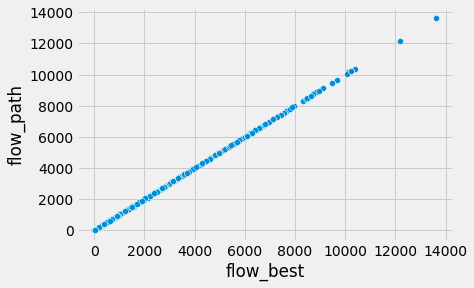

max diff in flow = 72.704
max rel diff in flow = 1.016%


,a_node,b_node,flow_bfw,flow_path,flow_best,abs_change,rel_change
706,355,343,821.095740,893.799866,893.800000,72.704126,0.088545
708,355,356,363.125583,312.125946,312.232482,50.999637,0.140446
54,36,394,367.796023,317.200043,317.200000,50.595980,0.137565
53,36,378,565.003977,615.599854,615.600000,50.595877,0.089550
503,298,134,317.992663,357.897064,352.705677,39.904401,0.125488
508,299,298,630.692798,670.597168,665.405677,39.904370,0.063271
515,301,300,372.594141,412.497101,407.305677,39.902960,0.107095
520,302,301,372.594141,412.497101,407.305677,39.902960,0.107095
524,303,42,353.094161,392.997040,387.805677,39.902879,0.113009
65,42,302,353.094161,392.997040,387.805677,39.902879,0.113009


In [22]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path']).merge(best_sol, on=['a_node', 'b_node'], how='outer')
#sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');
sns.scatterplot(data=full_result, x='flow_best', y='flow_path');
plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'flow_best', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))